In [7]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib import cm
from matplotlib.colors import LogNorm, Normalize
import awkward as ak
import numpy as np
%matplotlib inline
matplotlib.rc("figure", dpi=200)

from event_display import gdml_read_ecal_info, build_calorimeter_section, mpl_plot_mask, mpl_plot_hits, mpl_plot_event_array

import os 
dir_path = os.path.dirname(os.path.realpath("__file__"))
dir_path

'/home/romanov/eic/kak-bog-cherepahu/simulation'

In [8]:
# Load geometry file
ecal_info = gdml_read_ecal_info(f"{dir_path}/wall_only.gdml")

# ecal_info is of EcalGeoInfo class, which is a helper holding information
# about all needed ecal geometries.
# Print what information it holds:
ecal_info.print()

# Data file name
#data_file_name = f"{dir_path}/data/test_gun.edm4hep.root"
data_file_name = f"{dir_path}/2022-11-22_pgun_e-_wall_only_e0.01-30GeV_center_1prt_100evt.edm4hep.root"

module_size_x    : 2.0
module_size_y    : 2.0
module_size_z    : 20.0
total_modules    : 121
num_modules_x    : 11
num_modules_y    : 11
min_x            : -12.299999999999999
max_x            : 8.200000000000001
min_y            : -12.299999999999999
max_y            : 8.200000000000001
min_z            : 0.0
max_z            : 0.0
border_left      : -13.299999999999999
border_right     : 9.200000000000001
border_top       : 9.200000000000001
border_bottom    : -13.299999999999999
unit             : cm


(<matplotlib.colors.LogNorm at 0x7f11e8c63670>,
 <AxesSubplot:>)

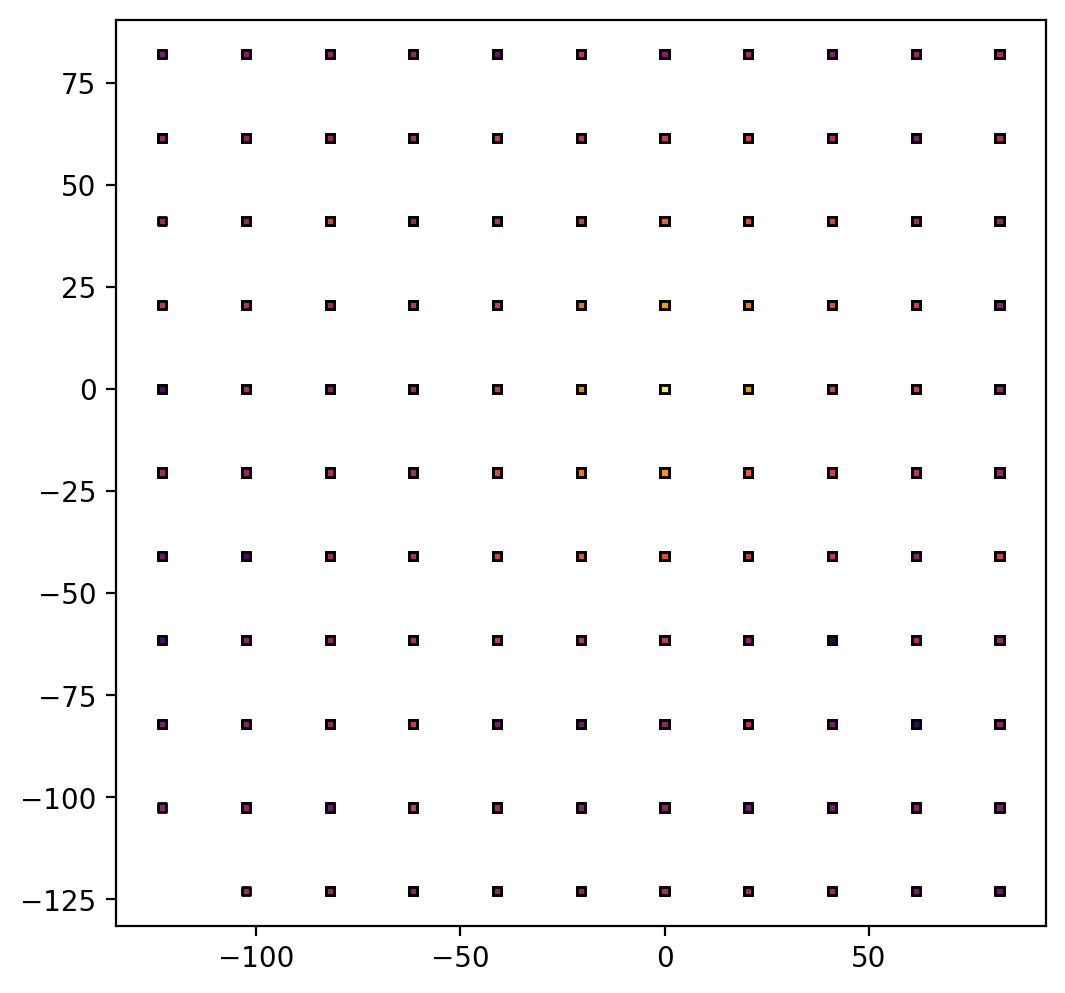

In [9]:
# Open root file and get "events" tree from it
tree = uproot.open(data_file_name)["events"]

# Number of events to process:
entry_start = 17                  # (!) Try changing those
entry_stop = 28                   # <==

# Read energies, x and y positions
energies = tree['WallECalHits/WallECalHits.energy'].array(entry_start=entry_start, entry_stop=entry_stop)
hits_x = tree['WallECalHits/WallECalHits.position.x'].array(entry_start=entry_start, entry_stop=entry_stop)
hits_y = tree['WallECalHits/WallECalHits.position.y'].array(entry_start=entry_start, entry_stop=entry_stop)

# Flatten arrays for simplicity
energies = ak.flatten(energies).to_numpy()
hits_x = ak.flatten(hits_x).to_numpy()
hits_y = ak.flatten(hits_y).to_numpy()

# At this point we have `hits_x` and `hits_y` a cell centers and corresponding `energies` arrays.
# We can draw how such data looks
fig, ax = plt.subplots(figsize=(6,6))
mpl_plot_hits(energies, hits_x, hits_y, ax, ecal_info.module_size_x, ecal_info.module_size_y)

In [10]:
event_data = ecal_info.arrays_to_event(energies, hits_x, hits_y)
fig, ax = plt.subplots(figsize=(6,6))
mpl_plot_event_array(event_data, ax)

IndexError: index -14 is out of bounds for axis 0 with size 11

In [ ]:
# Create module mask:
# a numpy array of size (num_modules_x, num_modules_y) that represents ecal modules layout
# Array values: 0 - no module here, 1 or 2 - module is here, 2 - modules on the edge of ecal
modules_mask = ecal_info.get_modules_mask()

# We can plot this mask with matplotlib, which the most self-describing:
fig, ax = plt.subplots(figsize=(6,6))

mpl_plot_mask(modules_mask, ax)

In [ ]:
# You can set the radius of edge modules:
modules_mask = ecal_info.get_modules_mask(edge_width=1)

# We can plot this mask with matplotlib, which the most self-describing:
fig, ax = plt.subplots(figsize=(6,6))
mpl_plot_mask(modules_mask, ax)

In [ ]:
# We can plot this mask with matplotlib, which the most self-describing:
fig, ax = plt.subplots(figsize=(8,8))
ecal_info.mpl_plot_event(event_data, ax)


In [ ]:
%time events = ecal_info.read_events_from_file(data_file_name, 0, 1000)

In [ ]:
np.shape(event_data)